In [1]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import plotly.express as px
from wordcloud import WordCloud
import re
from collections import Counter
import numpy as np
import pandas as pd 

nltk.download('stopwords')
nltk.download('wordnet')

import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df=pd.read_csv("/kaggle/input/paper-keyword/papers.csv")

In [3]:
df.head()

id  year                                              title event_type  \
0     1  1987  Self-Organization of Associative Database and ...        NaN   
1    10  1987  A Mean Field Theory of Layer IV of Visual Cort...        NaN   
2   100  1988  Storing Covariance by the Associative Long-Ter...        NaN   
3  1000  1994  Bayesian Query Construction for Neural Network...        NaN   
4  1001  1994  Neural Network Ensembles, Cross Validation, an...        NaN   

                                            pdf_name          abstract  \
0  1-self-organization-of-associative-database-an...  Abstract Missing   
1  10-a-mean-field-theory-of-layer-iv-of-visual-c...  Abstract Missing   
2  100-storing-covariance-by-the-associative-long...  Abstract Missing   
3  1000-bayesian-query-construction-for-neural-ne...  Abstract Missing   
4  1001-neural-network-ensembles-cross-validation...  Abstract Missing   

                                          paper_text  
0  767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...  
1  683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...  
2  394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...  
3  Bayesian Query Construction for Neural\nNetwor...  
4  Neural Network Ensembles, Cross\nValidation, a...

In [4]:
df.shape

(7241, 7)

In [5]:
df.isnull().sum()

id               0
year             0
title            0
event_type    4819
pdf_name         0
abstract         0
paper_text       0
dtype: int64

# 🧹 Abstract Column Cleaning

We use `pandas.Series.replace()` to standardize the 'abstract' column:

- Replace `'Unknown'` with `'Missing'`
- Replace `'Missing Missing'` with `'Abstract Missing'`

This ensures consistent labels for missing abstracts.


In [6]:
# Convert 'year' to numeric, numeric
df['year'] = pd.to_numeric(df['year'], errors='coerce')
# Clean 'abstract' column
df['abstract'] = df['abstract'].replace({'Unknown': 'Missing', 'Missing Missing': 'Abstract Missing'})

## ✨ Filling Missing Strings with Mode

To ensure consistency, we replace missing or null string values in a column with the most frequently occurring (mode) value using:

```python
df['column'] = df['column'].fillna(df['column'].mode()[0])


In [7]:
mode=df["event_type"].mode()[0]
df["event_type"]=df["event_type"].replace("",pd.NA)
df["event_type"]=df["event_type"].fillna(mode)

In [8]:
df.isnull().sum()

id            0
year          0
title         0
event_type    0
pdf_name      0
abstract      0
paper_text    0
dtype: int64

#  Histogram of Publication Years



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


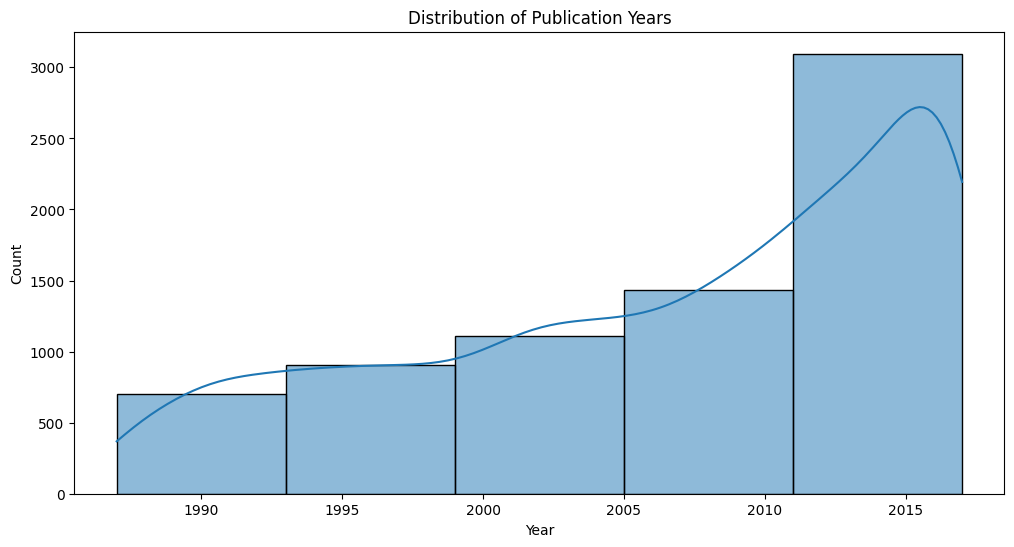

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(df['year'], bins=5, kde=True)
plt.title('Distribution of Publication Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Bar Plot of Publication Years



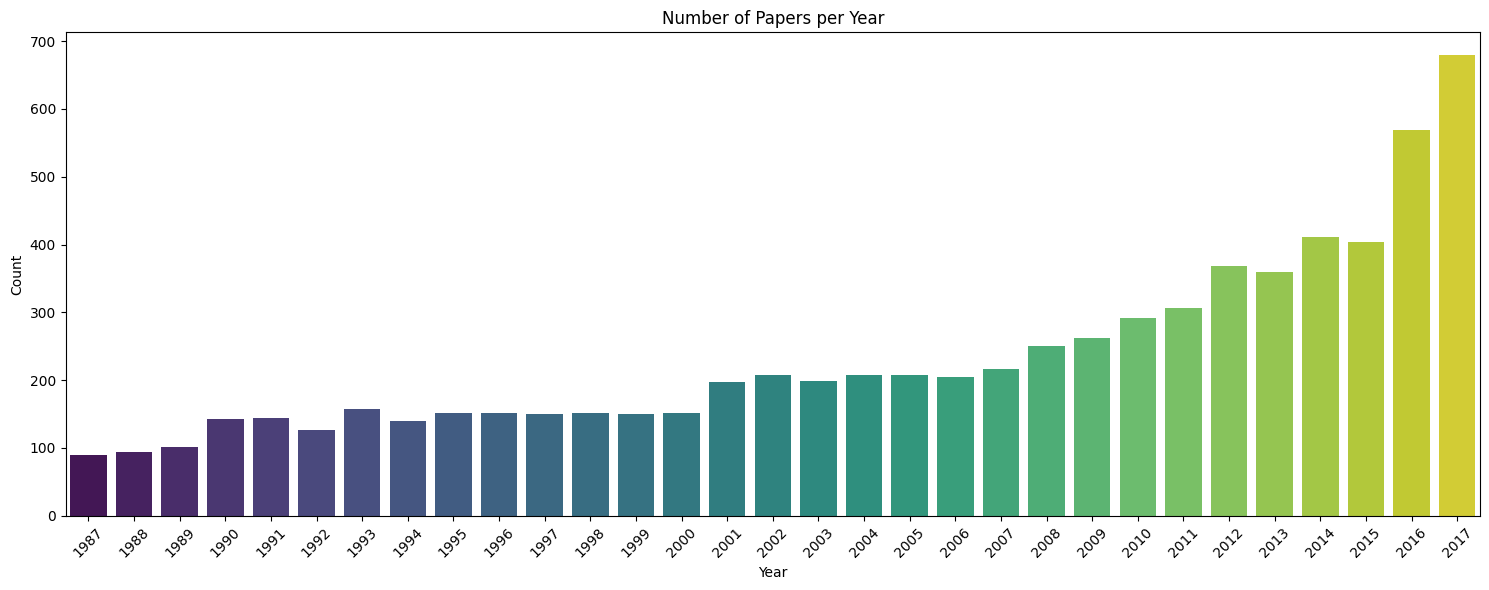

In [10]:
# Count and sort the number of papers per year
year_counts = df['year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(15, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, palette="viridis")

plt.title('Number of Papers per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#  Scatter Plot of ID vs Year



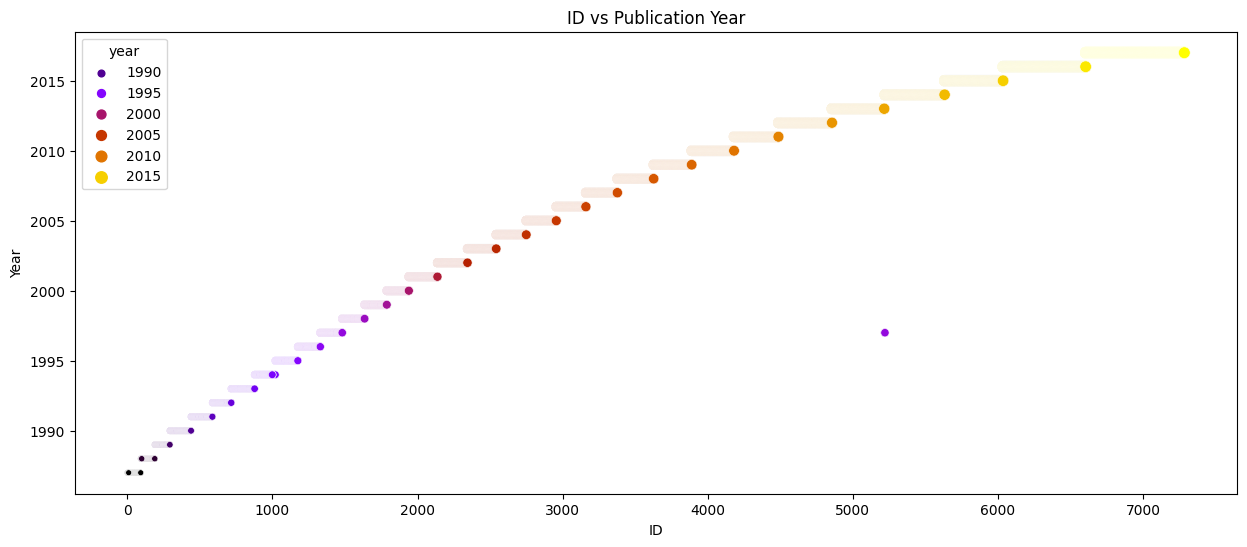

In [11]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='id', y='year', size='year', hue='year',data=df,palette="gnuplot")
plt.title('ID vs Publication Year')
plt.xlabel('ID')
plt.ylabel('Year')
plt.show()

# Word Cloud of Titles



In [ ]:
# Combine all titles into one string
text = ' '.join(df['title'].str.lower())
# Remove common stopwords
stopwords = set(['and', 'of', 'for', 'by', 'the', '...'])
words = [word for word in re.findall(r'\w+', text) if word not in stopwords]
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Paper Titles')
plt.show()

#  Word Frequency Bar Plot for Titles



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


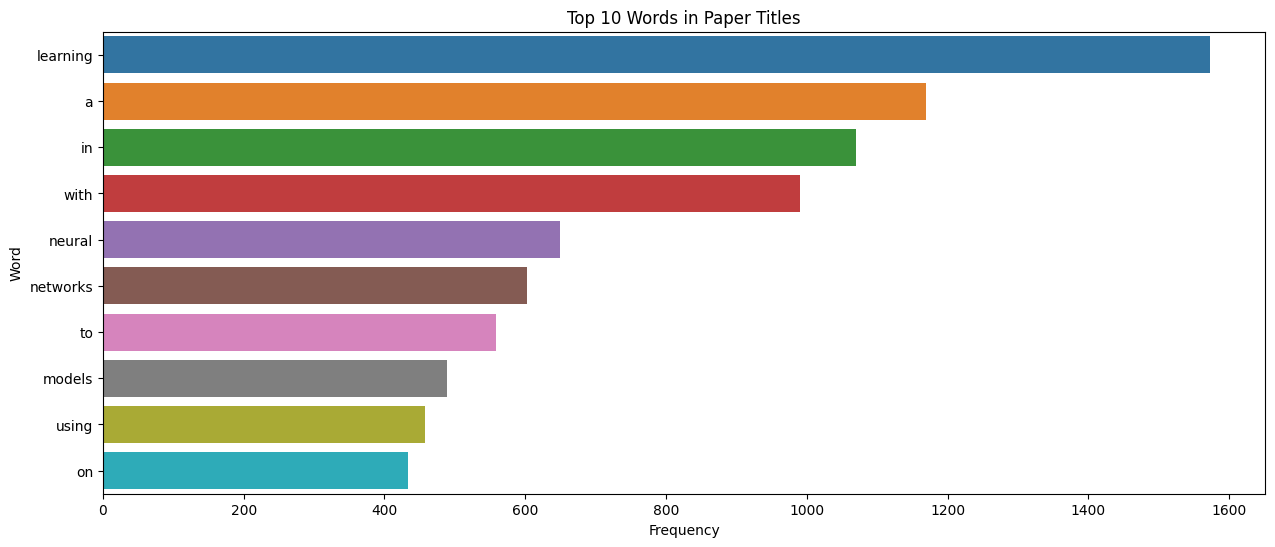

In [ ]:
word_counts = Counter(words)
top_words = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:10])
plt.figure(figsize=(15, 6))
sns.barplot(x=list(top_words.values()), y=list(top_words.keys()))
plt.title('Top 10 Words in Paper Titles')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

#  Box Plot of Years



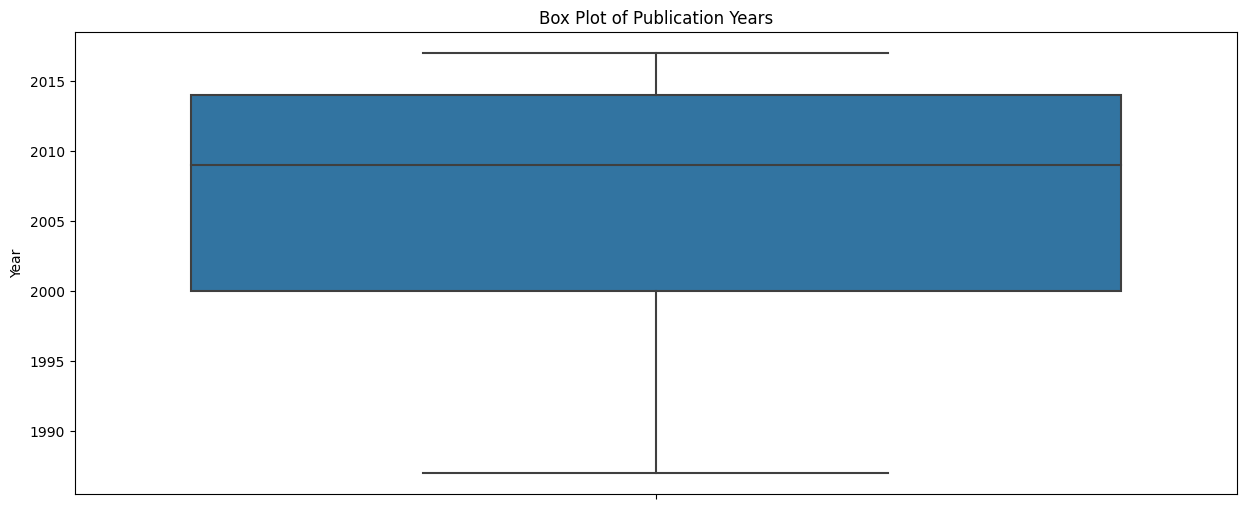

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(y=df['year'])
plt.title('Box Plot of Publication Years')
plt.ylabel('Year')
plt.show()

#  Heatmap of Missing Values



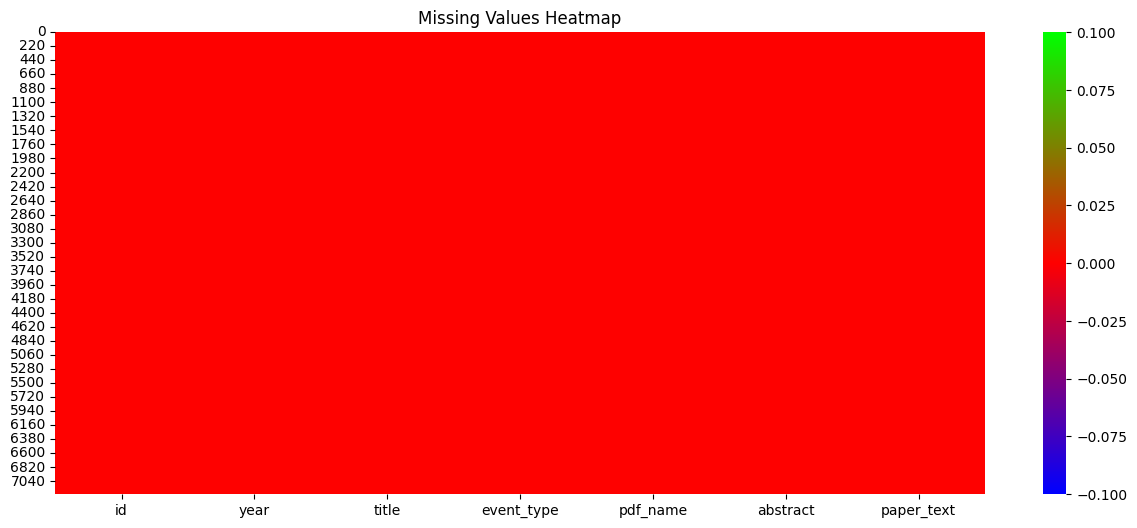

In [15]:
plt.figure(figsize=(15, 6))
sns.heatmap(df.isna(), cbar=True, cmap='brg')
plt.title('Missing Values Heatmap')
plt.show()

# Interactive Scatter Plot with Plotly



In [16]:
fig = px.scatter(df, x='id', y='year', color='year', size='year', hover_data=['title'], title='Interactive ID vs Year')
fig.show()

#  Timeline Plot



In [17]:
fig = px.scatter(
    df,
    x='year',
    y='id',
    text=df['title'].str.slice(0, 15),
    color='year',
    title='Timeline of Papers',
    labels={'year': 'Year', 'id': 'Paper ID'},
    height=1000,
    width=2000
)

fig.update_traces(marker=dict(size=8), textposition='top center')
fig.update_layout(showlegend=False)
fig.show()

In [18]:
df.head()

id  year                                              title event_type  \
0     1  1987  Self-Organization of Associative Database and ...     Poster   
1    10  1987  A Mean Field Theory of Layer IV of Visual Cort...     Poster   
2   100  1988  Storing Covariance by the Associative Long-Ter...     Poster   
3  1000  1994  Bayesian Query Construction for Neural Network...     Poster   
4  1001  1994  Neural Network Ensembles, Cross Validation, an...     Poster   

                                            pdf_name          abstract  \
0  1-self-organization-of-associative-database-an...  Abstract Missing   
1  10-a-mean-field-theory-of-layer-iv-of-visual-c...  Abstract Missing   
2  100-storing-covariance-by-the-associative-long...  Abstract Missing   
3  1000-bayesian-query-construction-for-neural-ne...  Abstract Missing   
4  1001-neural-network-ensembles-cross-validation...  Abstract Missing   

                                          paper_text  
0  767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...  
1  683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...  
2  394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...  
3  Bayesian Query Construction for Neural\nNetwor...  
4  Neural Network Ensembles, Cross\nValidation, a...

In [19]:
df["title"][0]

'Self-Organization of Associative Database and Its Applications'

In [20]:
df["pdf_name"][0]

'1-self-organization-of-associative-database-and-its-applications.pdf'

In [21]:
df["paper_text"][0]

'767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABASE\nAND ITS APPLICATIONS\nHisashi Suzuki and Suguru Arimoto\nOsaka University, Toyonaka, Osaka 560, Japan\nABSTRACT\nAn efficient method of self-organizing associative databases is proposed together with\napplications to robot eyesight systems. The proposed databases can associate any input\nwith some output. In the first half part of discussion, an algorithm of self-organization is\nproposed. From an aspect of hardware, it produces a new style of neural network. In the\nlatter half part, an applicability to handwritten letter recognition and that to an autonomous\nmobile robot system are demonstrated.\n\nINTRODUCTION\nLet a mapping f : X -+ Y be given. Here, X is a finite or infinite set, and Y is another\nfinite or infinite set. A learning machine observes any set of pairs (x, y) sampled randomly\nfrom X x Y. (X x Y means the Cartesian product of X and Y.) And, it computes some\nestimate j : X -+ Y of f to make small, the estimation erro

In [22]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Lowercase all text
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove hashtags and mentions
    text = re.sub(r'[@#]\w+', '', text)

    # Remove punctuation, digits, and non-word characters
    text = re.sub(r'[\d\W_]+', ' ', text)

    # Tokenize
    words = text.split()

    # Remove stopwords and short words
    words = [word for word in words if word not in stop_words and len(word) >= 3]

    # Lemmatize
    words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(words)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
from tqdm.notebook import tqdm
tqdm.pandas()
df['paper_text'] = df['paper_text'].progress_apply(clean_text)

  0%|          | 0/7241 [00:00<?, ?it/s]

In [24]:
df.head()

id  year                                              title event_type  \
0     1  1987  Self-Organization of Associative Database and ...     Poster   
1    10  1987  A Mean Field Theory of Layer IV of Visual Cort...     Poster   
2   100  1988  Storing Covariance by the Associative Long-Ter...     Poster   
3  1000  1994  Bayesian Query Construction for Neural Network...     Poster   
4  1001  1994  Neural Network Ensembles, Cross Validation, an...     Poster   

                                            pdf_name          abstract  \
0  1-self-organization-of-associative-database-an...  Abstract Missing   
1  10-a-mean-field-theory-of-layer-iv-of-visual-c...  Abstract Missing   
2  100-storing-covariance-by-the-associative-long...  Abstract Missing   
3  1000-bayesian-query-construction-for-neural-ne...  Abstract Missing   
4  1001-neural-network-ensembles-cross-validation...  Abstract Missing   

                                          paper_text  
0  self organization associative database applica...  
1  mean field theory layer visual cortex applicat...  
2  storing covariance associative long term poten...  
3  bayesian query construction neural network mod...  
4  neural network ensemble cross validation activ...

In [25]:
df=df.head(1000)

In [26]:
text=df["paper_text"]
cv = CountVectorizer(max_df=0.85,max_features=500,ngram_range=(1,3))

counts = cv.fit_transform(text)

tfidf_transformer = TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf = tfidf_transformer.fit_transform(counts)
tfidf


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 201247 stored elements and shape (1000, 500)>

In [27]:
import pickle
file=open("cv.pkl","wb")
pickle.dump(cv,file)
file.close()

In [28]:
f=open("tfidf.pkl","wb")
pickle.dump(tfidf_transformer,f)
f.close()

In [29]:
from typing import List, Tuple, Dict
from scipy.sparse import coo_matrix
import numpy as np

def sort_coo(matrix: coo_matrix) -> List[Tuple[int, float]]:
    """
    Sort a COO sparse matrix by data values (descending) and column indices (descending).

    Args:
        matrix (coo_matrix): A sparse matrix in COO format.

    Returns:
        List[Tuple[int, float]]: A list of tuples containing (column index, data value),
                                 sorted by data value (descending) and then column index (descending).

    Raises:
        ValueError: If the input matrix is empty (no non-zero elements).
    """
    if matrix.nnz == 0:
        raise ValueError("Input matrix has no non-zero elements.")
    
    # Combine column indices and data values into tuples
    tuples = zip(matrix.col, matrix.data)
    # Sort by data value (primary) and column index (secondary), both descending
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(
    feature_names: List[str],
    sorted_items: List[Tuple[int, float]],
    topn: int = 10,
    decimals: int = 3
) -> Dict[str, float]:
    """
    Extract the top N features and their scores from a sorted list of (index, score) tuples.

    Args:
        feature_names (List[str]): List of feature names corresponding to column indices.
        sorted_items (List[Tuple[int, float]]): Sorted list of (column index, score) tuples.
        topn (int, optional): Number of top features to extract. Defaults to 10.
        decimals (int, optional): Number of decimal places to round scores. Defaults to 3.

    Returns:
        Dict[str, float]: Dictionary mapping feature names to their rounded scores.

    Raises:
        ValueError: If topn is negative, exceeds available items, or if feature_names is too short.
    """
    if topn < 0:
        raise ValueError("topn must be non-negative.")
    if not sorted_items:
        raise ValueError("sorted_items is empty.")
    if topn > len(sorted_items):
        raise ValueError(f"topn ({topn}) exceeds number of items ({len(sorted_items)}).")
    if max(idx for idx, _ in sorted_items) >= len(feature_names):
        raise ValueError("Feature names list is too short for the given indices.")

    # Take top N items
    sorted_items = sorted_items[:topn]
    
    # Create dictionary of feature names and rounded scores
    return {
        feature_names[idx]: round(score, decimals)
        for idx, score in sorted_items
    }

In [30]:
feature_names=cv.get_feature_names_out()
file=open("feature_names.pkl","wb")
pickle.dump(feature_names,file)
file.close()

In [31]:
print(f"Feature Names : {feature_names[230 : 240]}")

Feature Names : ['known' 'label' 'large' 'larger' 'layer' 'lead' 'learn' 'learned'
 'learning' 'learning algorithm']


In [32]:
from typing import List, Tuple, Dict, Union

def get_keywords(
    text: Union[str, int],
    df: pd.DataFrame = None,
    cv: CountVectorizer = None,
    tfidf_transformer: TfidfTransformer = None,
    feature_names: List[str] = None,
    topn: int = 10
) -> Dict[str, float]:
    """
    Extract top keywords from a text string or a dataframe document by index.

    Args:
        text: Either a string (raw text) or an integer (index into df['paper_text']).
        df: Dataframe containing 'paper_text' column (required if text is an index).
        cv: Fitted CountVectorizer instance.
        tfidf_transformer: Fitted TfidfTransformer instance.
        feature_names: List of feature names from CountVectorizer.
        topn: Number of top keywords to extract.

    Returns:
        Dict[str, float]: Dictionary of top keywords and their TF-IDF scores.

    Raises:
        ValueError: If inputs are invalid or dependencies are missing.
    """
    if cv is None or tfidf_transformer is None or feature_names is None:
        raise ValueError("cv, tfidf_transformer, and feature_names must be provided.")
    
    if isinstance(text, int):
        if df is None or 'paper_text' not in df.columns:
            raise ValueError("Dataframe with 'paper_text' column required when text is an index.")
        if text < 0 or text >= len(df):
            raise ValueError(f"Index {text} out of range for dataframe with {len(df)} rows.")
        doc = clean_text(df['paper_text'].iloc[text])
    else:
        doc = clean_text(text)

    if not doc or doc.isspace():
        raise ValueError("Text is empty after preprocessing.")

    tf_idf_vector = tfidf_transformer.transform(cv.transform([doc]))
    sorted_items = sort_coo(tf_idf_vector.tocoo())
    keywords = extract_topn_from_vector(feature_names, sorted_items, topn)
    return keywords


In [33]:
# Print results function
def print_results(
    idx: int,
    keywords: Dict[str, float],
    df: pd.DataFrame
) -> None:
    """Print title, abstract, and keywords for a document."""
    if idx < 0 or idx >= len(df):
        raise ValueError(f"Index {idx} out of range for dataframe with {len(df)} rows.")
    
    print("Title:")
    print(df['title'].iloc[idx])
    print("\nAbstract:")
    print(df['abstract'].iloc[idx])
    print("\nKeywords for this text:")
    for k, v in keywords.items():
        print(f"{k}: {v}")


In [34]:
# Test with provided text
testing = """valid generalization size weight important size network peter bartlett department system engineering research school information science engineering australian national university canberra australia peter bartlettclanu edu abstract paper show neural network used pattern classification problem learning algorithm find network small weight small squared error training pattern generalization performance depends size weight rather number weight specifically consider layer feed forward network sigmoid unit sum magnitude weight associated unit bounded misclassification probability converges error estimate closely related squared error training set rate log ignoring log factor number training pattern input dimension constant may explain generalization performance neural network particularly number training example considerably smaller number weight support heuristic weight decay early stopping attempt keep weight small training introduction result statistical learning theory give bound number training example necessary satisfactory generalization performance classification problem term vapnik chervonenkis dimension class function used learning system see example baum haussler used result give size bound multi layer threshold network generalization size weight neural network grow least quickly number weight see however pattern classification application bound seem loose neural network often perform successfully training set considerably smaller number weight paper show classification problem neural network perform well weight big size weight determines generalization performance contrast function class algorithm considered theory neural network used binary classification problem real valued output learning algorithm typically attempt minimize squared error network output training set well encouraging correct classification tends push output away zero towards target value easy see total squared error hypothesis example example hypothesis either incorrect sign magnitude le next section give misclassification probability bound hypothesis distinctly correct way example bound term scale sensitive version dimension called fat shattering dimension section give bound dimension feedforward sigmoid network imply main result proof sketched section full proof found full version notation bound misclassification probability denote space input pattern space label assume probability distribution product space reflects relative frequency different input pattern relative frequency expert classification pattern learning algorithm us class real valued function called hypothesis class hypothesis correct example sgn sgn take value iff misclassification probability error defined erp sgn crucial quantity determining misclassification probability fat shattering dimension hypothesis class say sequence point shattered iffunctions give classification sequence satisfying sgn dimension defined size largest shattered sequence given scale parameter say sequence point shattered sequence real value satisfying rdb fat shattering dimension denoted fath size largest shattered sequence dimension reflects complexity function class examined scale notice fath nonincreasing function following theorem give generalization error bound term fath related applies case error training set appear theorem define input space hypothesis class probability distribution let probability training sequence labelled fact according usual definition dimension class thresholded version function bartlett example every hypothesis satisfies erp xdl sgn log fathb comment informative compare standard bound case bound misclassification probability erp sgn ydl dlog log vcdim constant shall see next section function class vcdim infinite fathb finite example class function computed layer neural network arbitrary number parameter constraint size parameter known learning algorithm error estimate constrained make use considering proportion training example hypothesis misclassify distribution second term bound cannot improved log factor theorem show improved learning algorithm make use considering proportion training example correctly classified xdl possible give lower bound see full paper function class considered show theorem cannot improved log factor idea magnitude value give precise estimate generalization performance first proposed vapnik developed vapnik worker used case linear hypothesis class result give bound misclassification probability test term value training test data extended give bound misclassification probability unseen data term value training example extended general function class give error bound applicable hypothesis error training example lugosi pinter obtained bound misclassification probability term similar property class function containing true regression function conditional expectation given however result extend case true regression function class real valued function used estimator seems unnatural quantity specified advance theorem since depends example full paper give similar statement made uniform value quantity fat shattering dimension neural network bound dimensionofvarious neural network class established see review least linear number parameter section give bound fat shattering dimension several neural network class generalization size ofthe weight neural network assume input space subset define sigmoid unit function parametrized vector weight unit computes fixed bounded function satisfying lipchitz condition simplicity ignore offset parameter equivalent including extra input constant value multi layer feed forward sigmoid network depth network sigmoid unit single output unit arranged layered structure layer output unit pass input unit later layer consider network weight bounded relevant norm norm vector define iiwl iwil following give bound fatshattering dimension bounded linear combination real valued function term fat shattering dimension basis function class apply recursive fashion give bound single output feed forward network theorem let class function map define class weight bounded linear combination function wdi suppose fatfb log constant fathb gurvits koiran shown fat shattering dimension class layer network bounded output weight linear threshold hidden unit log lrn special case theorem improves notice fat shattering dimension function class changed constant factor compose function fixed function satisfying lipschitz condition like standard sigmoid function fathb logn finally fathb observation together theorem give following corollary notation suppresses log factor formally corollary class layer sigmoid network weight outp unit satisfying iiwlh fathb ilxli hidden unit weight bounded fathb log applying theorem give following deeper network notice constraint number hidden unit layer total magnitude weight associated processing unit corollary constant class depth sigmoid network weight vector associated unit beyond first layer satisfies iiwlll fathb iixlioo weight first layer unit satisfy iiwll fathb llog first part corollary network fat shattering dimension similar dimension linear network formalizes intuition weight small network operates linear part sigmoid behaves like linear network bartlett comment consider depth sigmoid network bounded weight last corollary theorem imply training size grows roughly misclassification probability network within proportion training example network classifies distinctly correct result give plausible explanation generalization performance neural network application network many unit small weight small squared error training example dimension hence number parameter important magnitude weight generalization performance possible give version theorem probability bound uniform value complexity parameter indexing function class technique mentioned end section case sigmoid network class indexed weight bound minimizing resulting bound misclassification probability equivalent minimizing sum error term penalty term involving weight bound support use popular heuristic technique weight decay early stopping see example aim minimize squared error maintaining small weight technique give bound fat shattering dimension hence generalization performance function class expressed bounded number composition either bounded weight linear combination scalar lipschitz function function class finite fat shattering dimension includes example radial basis function network proof proof sketch theorem pseudometric space set cover tin define size smallest cover define pseudometric dloo set function defined dloo max set function denote maxxex dloo noo alon obtained following bound noo term fat shattering dimension lemma class function map fatf log noo log log provided log define piecewise linear squashing function satisfying otherwise class real valued function define set composition function lemma theorem erp cnoo orsgn generalization size weight neural network proof lemma relies observation erp sgn ydl ydl use standard symmetrization argument permutation argument introduced vapnik chervonenkis bound probability probability random permutation double length related property hold fixed use pollard approach approximating hypothesis class cover except case appropriate cover respect pseudometric applying hoeffding inequality give lemma prove theorem need bound covering number term fatshattering dimension easy apply lemma quantized version function class get bound taking advantage range constraint imposed squashing function proof sketch theorem define pseudometric class function defined similarly define set function defined denote maxxexm similarly idea proof theorem first derive general upper bound covering number class apply following implicit proof theorem give bound fat shattering dimension lemma class valued function satisfying fatf log derive upper bound start bound lemma implies covering number noo class hidden unit function since implies following bound covering number provided satisfies condition required lemma turn theorem trivial otherwise log dlog emm log next use following approximation barron attribute maurey lemma maurey suppose hilbert space let element convex closure function iii lil implies element approximated particular accuracy respect fixed linear combination small number element follows construct cover cover lemma inequality show log emma dlog log bartlett jensen inequality implies give bound comparing lower bound given lemma solving give refined analysis neural network case involves bounding successive layer solving give bound fat shattering dimension network acknowledgement thanks andrew barron jonathan baxter mike jordan adam kowalczyk wee sun lee phil long john shawe taylor robert slaviero helpful discussion comment reference alon ben david cesa bianchi haussler scale sensitive mensions uniform convergence learn ability proceeding ieee symposium foundation computer science ieee press bartlett complexity pattern classification neural network size weight important size network technical report department system engineering australian national university available anonymous ftp syseng anu edu pub peter bartlett kulkarni posner covering number realvalued function class technical report australian national university princeton university baum haussler size net give valid generalization neural computation blumer ehrenfeucht haussler warmuth learnability vapnik chervorienkis dimension acm gurvits koiran approximation learning convex superposition computational learning theory eurocolt haussler decision theoretic generalization pac model neural net learning application inform comput hertz krogh palmer introduction theory neural computation addison wesley lugosi pinter data dependent skeleton estimate learning proc annu conference comput learning theory acm press new york maass vapnik chervonenkis dimension neural net arbib editor handbook brain theory neural network page mit press cambridge shawe taylor bartlett williamson anthony framework structural risk minimisation proc annu conference comput learning theory acm press new york shawe taylor bartlett williamson anthony structural risk minimization data dependent hierarchy technical report vapnik estimation dependence based empirical data springerverlag new york"""  
keywords_text = get_keywords(text=testing,cv=cv,tfidf_transformer=tfidf_transformer,feature_names=feature_names)
print("\nKeywords for Test Text:\n")
for k, v in keywords_text.items():
    print(f"{k}: {v}")



Keywords for Test Text:

bound: 0.423
class: 0.335
dimension: 0.277
weight: 0.269
network: 0.266
theorem: 0.238
give: 0.213
log: 0.195
generalization: 0.164
hypothesis: 0.161



Results for document index 100:
Title:
Beating a Defender in Robotic Soccer: Memory-Based Learning of a Continuous Function

Abstract:
Abstract Missing

Keywords for this text:
memory: 0.773
learning: 0.222
action: 0.199
position: 0.194
training: 0.154
goal: 0.147
trial: 0.134
adaptive: 0.129
continuous: 0.113
example: 0.091


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



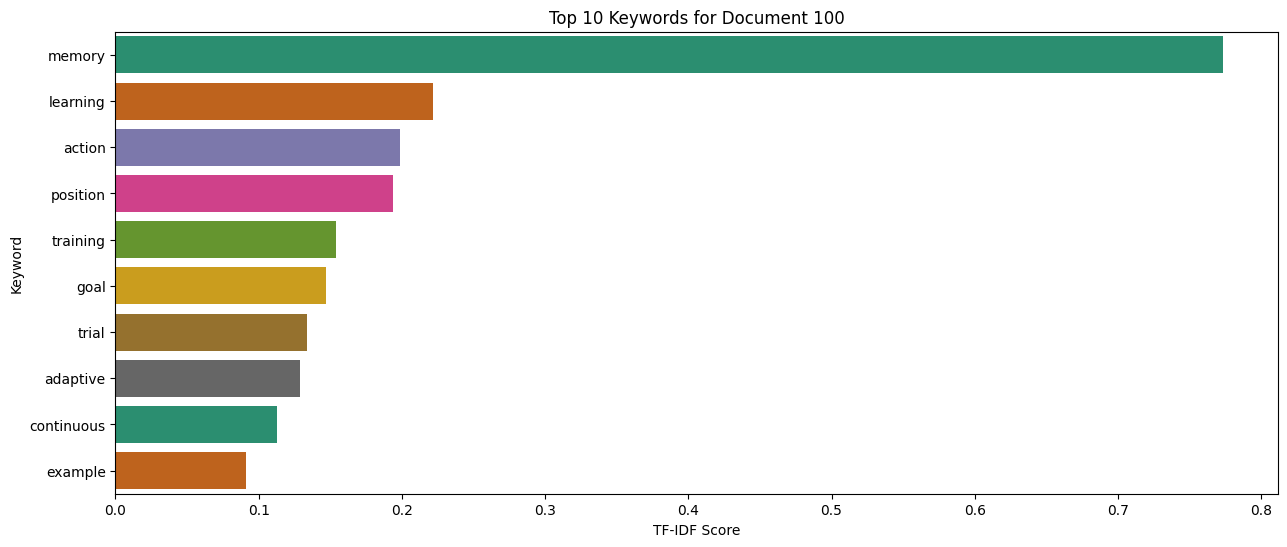

In [35]:
idx = 100
keywords = get_keywords(text=idx,df=df,cv=cv,tfidf_transformer=tfidf_transformer,feature_names=feature_names)
print(f"\nResults for document index {idx}:")
print_results(idx, keywords, df)

plt.figure(figsize=(15, 6))
sns.barplot(x=list(keywords.values()), y=list(keywords.keys()),palette="Dark2")
plt.title(f'Top 10 Keywords for Document {idx}')
plt.xlabel('TF-IDF Score')
plt.ylabel('Keyword')
plt.show()

In [36]:
! pip freeze

absl-py==1.4.0
accelerate==1.5.2
aiofiles==22.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.11.18
aiosignal==1.3.2
aiosqlite==0.21.0
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.5
ale-py==0.10.2
alembic==1.15.2
altair==5.5.0
annotated-types==0.7.0
annoy==1.17.3
ansicolors==1.1.8
antlr4-python3-runtime==4.9.3
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
args==0.1.0
array_record==0.7.1
arrow==1.3.0
arviz==0.21.0
astropy==7.0.1
astropy-iers-data==0.2025.3.31.0.36.18
asttokens==3.0.0
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
bayesian-optimization==2.0.3
beartype==0.20.2
beautifulsoup4==4.13.3
betterproto==2.0.0b6
bigframes==1.42.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.2.1
blobfile==3.0.0
blosc2==3.2.1
bokeh==3.6.3
Boruta==0.4.3
boto3==1.38.11
botocore==1.38.11
Bottleneck==1.4.2
-e git+https://github.com/SohierDane/BigQuery_Helper@8615a7f6c1663e7f2d48aa2b32c2dbcb600a440f#egg=bq_helper